# Credit Card Fraud Detection

## Dataset with credit card transactions information

### Dataset description

- **Introduction:**

Credit card fraud analysis can be viewed as a technique used to detect unusual patterns, outliers. It has many applications in the field of fraud detection, fault detection, system health monitoring among many others.

We are going to dive into anomaly detection using a the case of credit card fraud and combat it using the machine learning algorithms. We will use various predictive models in order to find out the accuracy of these models in detecting whether a transaction is a normal payment or a fraud.

- **Problem:**

Credit Card Fraud Detection involves modelling card transactions using the the transaction history based on the ones that turned out to be fraud. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


The dataset contains transactions made by credit cards in September 2013 by european cardholders


According to the description of the dataset the variables included are:

- **Time**: represents the seconds elapsed between that particular transaction and the first transaction in our data.

- **Vn** : It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, additional information regarding the original features cannot be provided.

- **Amount**: represents the transaction amount

- **Class** : represents out responsive variable where it takes the value of 1 if we are dealing with a fraudulent transaction and 0 gor genuine transactions

Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import recall_score # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
import itertools
import time
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import collections
from imblearn.over_sampling import SMOTE

### Data understanding

- Load data

In [2]:
df = pd.read_csv('creditcard.csv', sep=',')
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
### Check Number of columns and rows

print('This dataframe has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This dataframe has 284807 rows and 31 columns.


In [4]:
### Check variable types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print("Names of columns ", list(df.columns))

Names of columns  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [6]:
# Check that there are no missing values

def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [7]:
print("Genuine Data vs Fraudulent Data in % terms")

print(round(df['Class'].value_counts()[0]/len(df) * 100,2),':', round(df['Class'].value_counts()[1]/len(df) * 100,2)) ### Genuine vs Fraudlent Data in %

Genuine Data vs Fraudulent Data in % terms
99.83 : 0.17


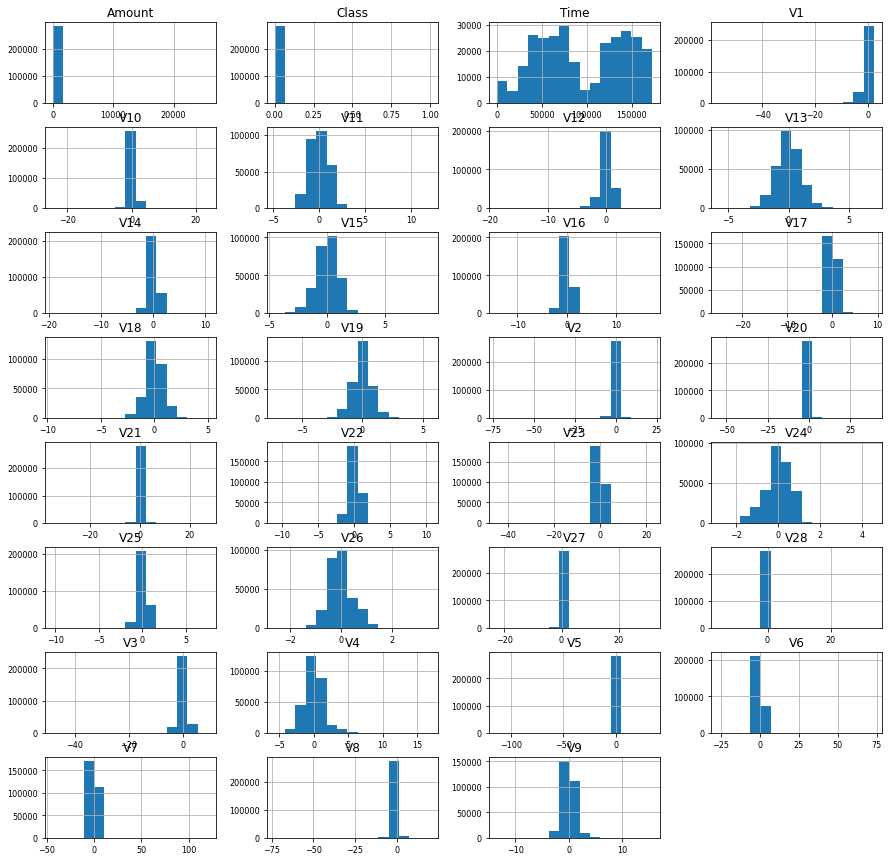

In [8]:
# Do histograms on all numeric variables
## Some variables show some skewed behaviour

numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 15), layout=(8, 4), xlabelsize=8, ylabelsize=8);

0    284315
1       492
Name: Class, dtype: int64


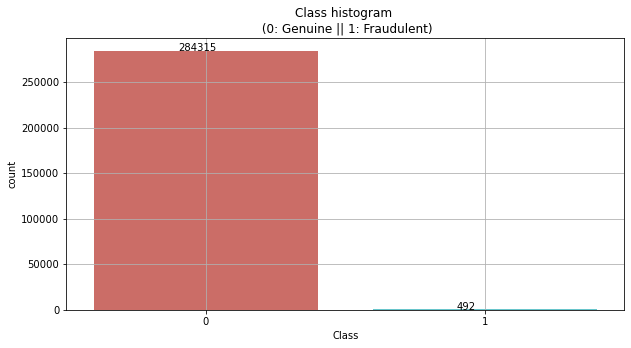

In [9]:
### Plotting class according to data set in order to see how the data is distributed

fig = plt.gcf()

fig.set_size_inches(10, 5)  #### Increase plot size (sns specific)

print(df['Class'].value_counts())

ax = sns.countplot(df['Class'], palette = "hls")

plt.title("Class histogram \n (0: Genuine || 1: Fraudulent)")


for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20)) ### Add values to countplot

plt.grid()
plt.show()

In [10]:
### Transaction Amount analysis
#### Looking at Amount data we may be dealing with some skewness

pd.set_option('precision', 3) ## Setting decimal numbers

df.loc[:, ['Amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,284807.0,88.35,250.12,0.0,5.6,22.0,77.165,25691.16


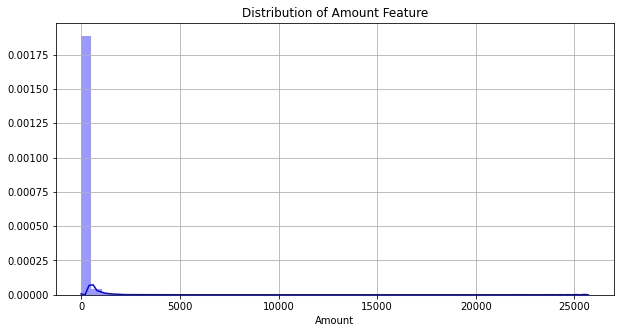

In [11]:
### Distribution of Amount

plt.figure(figsize=(10,5))

amount_val = df['Amount'].values

sns.distplot(amount_val, color = "blue")

plt.title("Distribution of Amount Feature")

plt.xlabel("Amount")

plt.grid()
plt.show()

In [12]:
### Time analysis

pd.set_option('precision', 3) ## Setting decimal numbers

df.loc[:, ['Time']].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.146,0.0,54201.5,84692.0,139320.5,172792.0


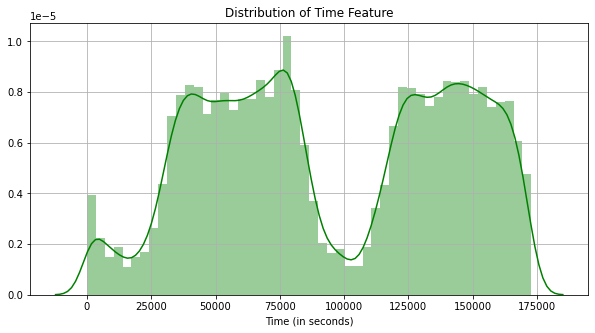

In [13]:
### Less transactions occur at night time

plt.figure(figsize=(10,5))

time_val = df['Time'].values

sns.distplot(time_val, color = "green")

plt.title("Distribution of Time Feature")

plt.xlabel("Time (in seconds)")

plt.grid()
plt.show()

- Creating two dataframes according to the Class feature

In [14]:
fraud_data = df.loc[df['Class'] == 1] ### fraudulent data

genuine_data = df.loc[df['Class'] == 0] ### genuine data

In [15]:
### Fraud Data Statistics

fraud_data.loc[:, ['Amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,492.0,122.211,256.683,0.0,1.0,9.25,105.89,2125.87


In [16]:
### Genuine Data Statistics

genuine_data.loc[:, ['Amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,284315.0,88.291,250.105,0.0,5.65,22.0,77.05,25691.16


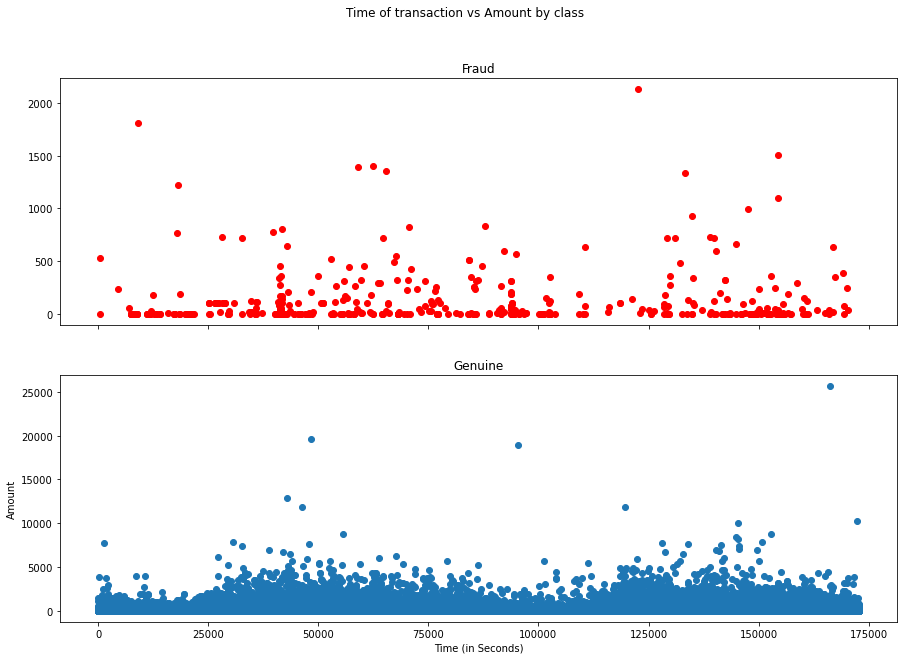

In [17]:
### Scatterplots


f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

f.suptitle('Time of transaction vs Amount by class') ### Main title

ax1.scatter(fraud_data.Time, fraud_data.Amount, color = "r")

ax1.set_title('Fraud')

ax2.scatter(genuine_data.Time, genuine_data.Amount)

ax2.set_title('Genuine')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

plt.show()

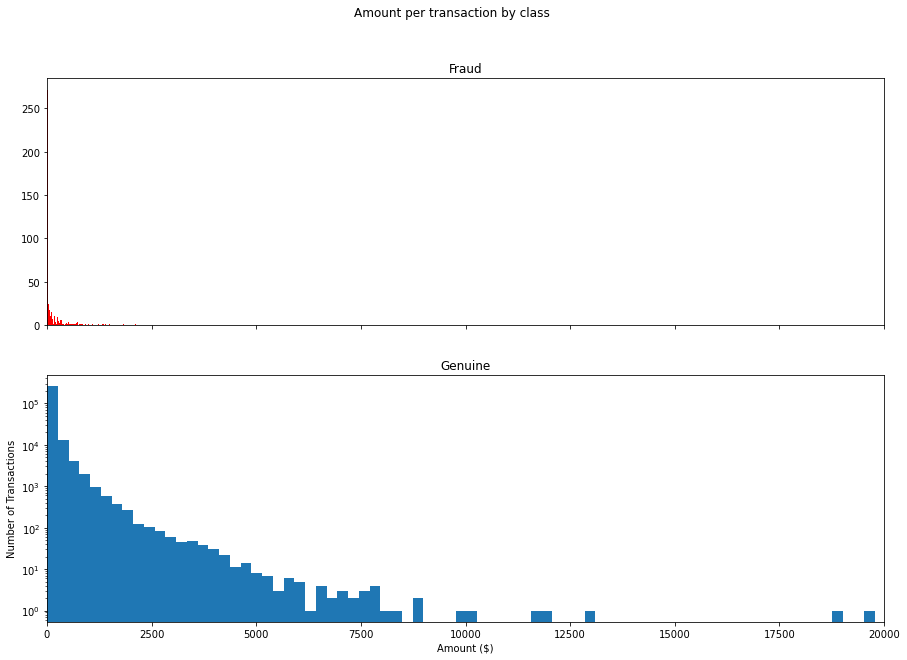

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

f.suptitle('Amount per transaction by class') ### Main title

ax1.hist(fraud_data.Amount, 100, color = "red")
ax1.set_title('Fraud')

ax2.hist(genuine_data.Amount, 100)
ax2.set_title('Genuine')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

plt.xlim((0, 20000))
plt.yscale('log')

plt.show()

It is clear from the plot that our data is highly imbalanced. There are very few fraudulent transactions in the data. This situation leads to class imbalance problem
We have 284315 genuine transactions and 492 fraudulent transactions. If we apply a classification algorithm, the algorithm learns well about the genuine cases because there are a lot of data points. As the fraudulent cases are too few, the algorithm doesn’t learn much about them. So the final model can classify the genuine cases with perfection. But, it will predict a large number of fraudulent cases as genuine.
The fraudulent transactions have very small amounts as compared to genuine transactions. The amounts are skewed too. So we need to normalize the amount.

In [19]:
#### Correlation Matrix

corr = df.corr()

corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


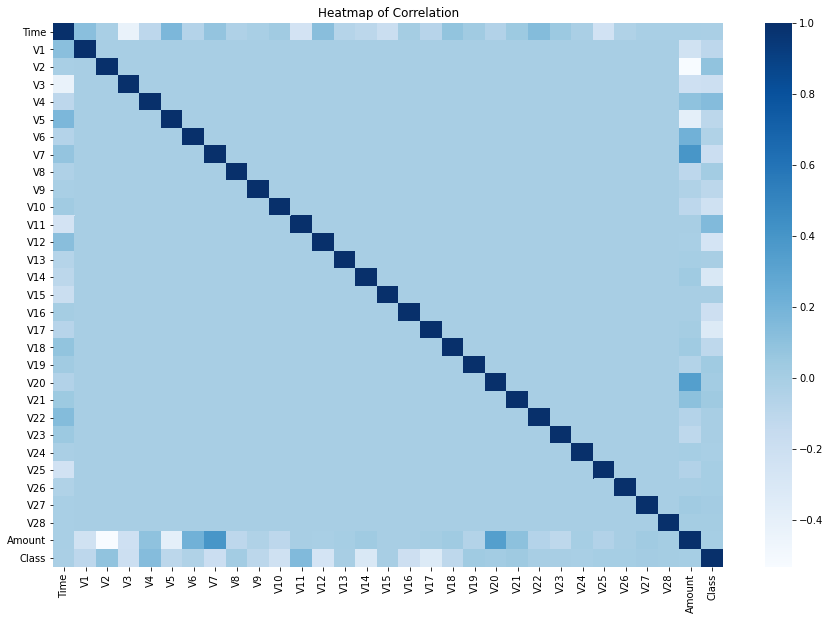

In [20]:
#heatmap

plt.figure(figsize=(15,10))

heat = sns.heatmap(data = corr, cmap = "Blues")

plt.title('Heatmap of Correlation')

plt.show()

### Data preparation

In [21]:
scaler = StandardScaler()

In [22]:
### Normalize amount

scaled_amount = scaler.fit_transform(df[['Amount']])

flat_list = [item for sublist in scaled_amount.tolist() for item in sublist]

scaled_amount = pd.Series(flat_list)

In [23]:
# Concatenating newly created columns with the original df

df = pd.concat([df, scaled_amount.rename('Scaled_Amount')], axis=1)

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Amount
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0,0.245
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0,-0.342
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0,1.161
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0,0.141
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0,-0.073


In [24]:
# Dropping old amount and time columns

df.drop(['Amount'], axis=1, inplace=True) ### inplace is permanent
df.drop(['Time'], axis=1, inplace=True) ### inplace is permanent
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.245
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,-0.342
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,1.161
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,0.141
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,-0.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,...,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0,-0.350
284803,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,...,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,0,-0.254
284804,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,...,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,0,-0.082
284805,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,...,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,0,-0.313


In [25]:
# Data Splitting

X = df.drop('Class', axis = 1).values

y = df['Class'].values ### target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

print("Train Shape: {} \nTest Shape: {}".format(X_train.shape, X_test.shape))

Train Shape: (227845, 29) 
Test Shape: (56962, 29)


In [26]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Modeling

- Training the model using different metrics

- Training Set

In [27]:
# 1. Decision Tree

start_time = time.time()

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy') ### for better results
tree_model.fit(X_train, y_train)
tree_y_train = tree_model.predict(X_train) #### Predicted Values (train set)

print("--- %s seconds ---" % (time.time() - start_time))

--- 6.026557445526123 seconds ---


In [28]:
# 2. K-Nearest Neighbors

start_time = time.time()

n = 5 ### default number

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_y_train = knn.predict(X_train)  #### Predicted Values (train set)

print("--- %s seconds ---" % (time.time() - start_time))

--- 1186.554869890213 seconds ---


In [29]:
# 3. Logistic Regression

start_time = time.time()

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_train = lr.predict(X_train)  #### Predicted Values(train set)

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.7907977104187012 seconds ---


In [30]:
# 4. SVM 

start_time = time.time()

svm = SVC(probability = True)
svm.fit(X_train, y_train)
svm_y_train = svm.predict(X_train)  #### Predicted Values (train set)

print("--- %s seconds ---" % (time.time() - start_time))

--- 2224.139788866043 seconds ---


In [31]:
# 5. Random Forest Tree

start_time = time.time()

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_y_train = rf.predict(X_train)  #### Predicted Values (train set)

print("--- %s seconds ---" % (time.time() - start_time))

--- 65.23336124420166 seconds ---


- Test Data

In [32]:
# 1. Decision Tree

### We allowed the tree to split four times 

start_time = time.time()

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy') ### for better results
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test) #### Predicted Values

print("--- %s seconds ---" % (time.time() - start_time))


--- 6.915700197219849 seconds ---


In [33]:
# 2. K-Nearest Neighbors

start_time = time.time()

n = 5 ### default number

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)  #### Predicted Values

print("--- %s seconds ---" % (time.time() - start_time))

--- 285.8621492385864 seconds ---


In [34]:
# 3. Logistic Regression

start_time = time.time()

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)  #### Predicted Values

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.8681256771087646 seconds ---


In [35]:
# 4. SVM 

start_time = time.time()

svm = SVC(probability = True)
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)  #### Predicted Values

print("--- %s seconds ---" % (time.time() - start_time))

--- 2241.500190258026 seconds ---


In [36]:
# 5. Random Forest Tree

start_time = time.time()

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)  #### Predicted Values

print("--- %s seconds ---" % (time.time() - start_time))

--- 48.67369866371155 seconds ---


#### Evaluation

In [37]:
### Performance Metrics

In [38]:
##### 1. Accuracy

$$ Accuracy of a model =  \frac{TP+TN}{TP+TN+FP+FN}$$

In [39]:
##### 2. F1 Score

$$ F1  Score = 2 * \frac {(precision * recall)}{(precision + recall)}$$

In [40]:
##### 3. Recall Score

$$ Recall =  \frac{TP}{TP+FN}$$

In [41]:
##### 4. Precision Score

$$ Precision =  \frac{TP}{TP+FP}$$

In [42]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

- Decision Tree

Accuracy score of the Decision Tree model is 0.9993679997191109
---------------------------------------------------------------
F1 Score score of the Decision Tree model is 0.8105263157894738
---------------------------------------------------------------
Recall score of the Decision Tree model is 0.7623762376237624
---------------------------------------------------------------
Precision score of the Decision Tree model is 0.8651685393258427.
---------------------------------------------------------------


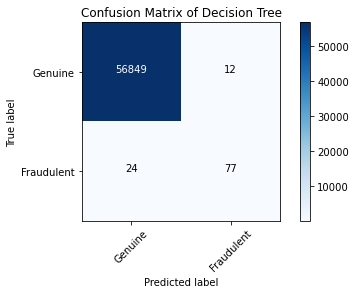

--- 0.8703446388244629 seconds ---


In [43]:
start_time = time.time()

print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))
print("---------------------------------------------------------------")
print('F1 Score score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
print("---------------------------------------------------------------")
print("Recall score of the Decision Tree model is {}".format(recall_score(y_test, tree_yhat)))
print("---------------------------------------------------------------")
print("Precision score of the Decision Tree model is {}.".format(precision_score(y_test, tree_yhat)))
print("---------------------------------------------------------------")

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])

tree_cm_plot = plot_confusion_matrix(tree_matrix, classes = ["Genuine","Fraudulent"], normalize = False, title = 'Decision Tree')

plt.grid(False)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

- Classification Report (Decision Tree)

In [44]:
print(classification_report(y_test, tree_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.87      0.76      0.81       101

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



- KNN Model

Accuracy score of the KNN model is 0.9995259997893332
---------------------------------------------------------------
F1 Score score of the KNN model is 0.8571428571428572
---------------------------------------------------------------
Recall score of the KNN model is 0.801980198019802
---------------------------------------------------------------
Precision score of the KNN model is 0.9204545454545454.
---------------------------------------------------------------


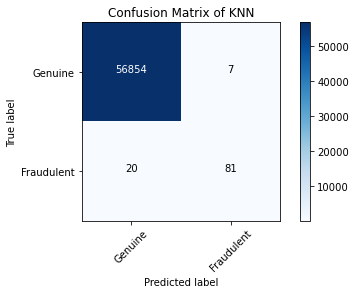

--- 0.5268213748931885 seconds ---


In [45]:
start_time = time.time()

print('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)))
print("---------------------------------------------------------------")
print('F1 Score score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))
print("---------------------------------------------------------------")
print("Recall score of the KNN model is {}".format(recall_score(y_test, knn_yhat)))
print("---------------------------------------------------------------")
print("Precision score of the KNN model is {}.".format(precision_score(y_test, knn_yhat)))
print("---------------------------------------------------------------")

tree_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])

tree_cm_plot = plot_confusion_matrix(tree_matrix, classes = ["Genuine","Fraudulent"], normalize = False, title = 'KNN')

plt.grid(False)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

- Classification Report (KNN Model)

In [46]:
print(classification_report(y_test, knn_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.80      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



- Logistic Regression

Accuracy score of the LR model is 0.9991924440855307
---------------------------------------------------------------
F1 Score score of the LR model is 0.7356321839080459
---------------------------------------------------------------
Recall score of the LR model is 0.6336633663366337
---------------------------------------------------------------
Precision score of the LR model is 0.8767123287671232.
---------------------------------------------------------------


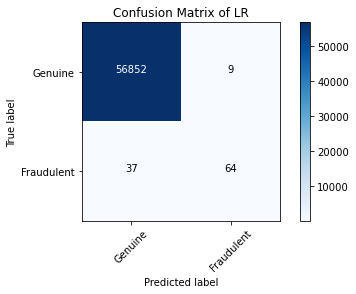

--- 0.5064678192138672 seconds ---


In [47]:
start_time = time.time()

print('Accuracy score of the LR model is {}'.format(accuracy_score(y_test, lr_yhat)))
print("---------------------------------------------------------------")
print('F1 Score score of the LR model is {}'.format(f1_score(y_test, lr_yhat)))
print("---------------------------------------------------------------")
print("Recall score of the LR model is {}".format(recall_score(y_test, lr_yhat)))
print("---------------------------------------------------------------")
print("Precision score of the LR model is {}.".format(precision_score(y_test, lr_yhat)))
print("---------------------------------------------------------------")

tree_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])

tree_cm_plot = plot_confusion_matrix(tree_matrix, classes = ["Genuine","Fraudulent"], normalize = False, title = 'LR')

plt.grid(False)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

- Classification Report (Logistic Regression Model)

In [48]:
print(classification_report(y_test, lr_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



- SVM Model

Accuracy score of the SVM model is 0.9993153330290369
---------------------------------------------------------------
F1 Score score of the SVM model is 0.7771428571428572
---------------------------------------------------------------
Recall score of the SVM model is 0.6732673267326733
---------------------------------------------------------------
Precision score of the SVM model is 0.918918918918919.
---------------------------------------------------------------


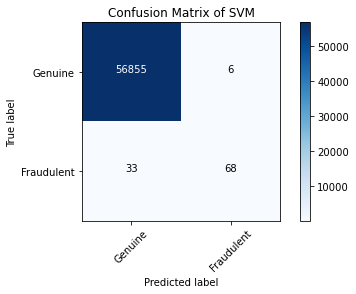

--- 0.4210665225982666 seconds ---


In [49]:
start_time = time.time()

print('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)))
print("---------------------------------------------------------------")
print('F1 Score score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)))
print("---------------------------------------------------------------")
print("Recall score of the SVM model is {}".format(recall_score(y_test, svm_yhat)))
print("---------------------------------------------------------------")
print("Precision score of the SVM model is {}.".format(precision_score(y_test, svm_yhat)))
print("---------------------------------------------------------------")

tree_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])

tree_cm_plot = plot_confusion_matrix(tree_matrix, classes = ["Genuine","Fraudulent"], normalize = False, title = 'SVM')

plt.grid(False)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

- Classification Report (SVM Model)

In [50]:
print(classification_report(y_test, svm_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.67      0.78       101

    accuracy                           1.00     56962
   macro avg       0.96      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962



- Random Forest Model

Accuracy score of the Random Forest model is 0.9992977774656788
---------------------------------------------------------------
F1 Score score of the Random Forest model is 0.7727272727272727
---------------------------------------------------------------
Recall score of the Random Forest model is 0.6732673267326733
---------------------------------------------------------------
Precision score of the Random Forest model is 0.9066666666666666.
---------------------------------------------------------------


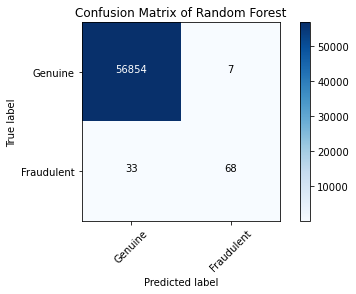

--- 0.4129784107208252 seconds ---


In [51]:
start_time = time.time()

print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))
print("---------------------------------------------------------------")
print('F1 Score score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))
print("---------------------------------------------------------------")
print("Recall score of the Random Forest model is {}".format(recall_score(y_test, rf_yhat)))
print("---------------------------------------------------------------")
print("Precision score of the Random Forest model is {}.".format(precision_score(y_test, rf_yhat)))
print("---------------------------------------------------------------")

tree_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])

tree_cm_plot = plot_confusion_matrix(tree_matrix, classes = ["Genuine","Fraudulent"], normalize = False, title = 'Random Forest')

plt.grid(False)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

- Classification Report (Random Forest)

In [52]:
print(classification_report(y_test, rf_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.91      0.67      0.77       101

    accuracy                           1.00     56962
   macro avg       0.95      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [53]:
# DataFrames comparing both the training and testing measures for each model and plotting each ROC curve

In [54]:
#### 1. Decision Tree

tree_df = pd.DataFrame({"Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
                       "Train":[accuracy_score(y_train, tree_y_train), recall_score(y_train, tree_y_train), precision_score(y_train, tree_y_train), f1_score(y_train, tree_y_train)],
                       "Test": [accuracy_score(y_test, tree_yhat), recall_score(y_test, tree_yhat), precision_score(y_test, tree_yhat), f1_score(y_test, tree_yhat)]
})

tree_df

,Metric,Train,Test
0,Accuracy,0.999,0.999
1,Recall,0.793,0.762
2,Precision,0.891,0.865
3,F1 Score,0.839,0.811


In [55]:
#### 2. KNN

knn_df = pd.DataFrame({"Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
                       "Train":[accuracy_score(y_train, knn_y_train), recall_score(y_train, knn_y_train), precision_score(y_train, knn_y_train), f1_score(y_train, knn_y_train)],
                       "Test": [accuracy_score(y_test, knn_yhat), recall_score(y_test, knn_yhat), precision_score(y_test, knn_yhat), f1_score(y_test, knn_yhat)]
})

knn_df

,Metric,Train,Test
0,Accuracy,1.000,1.000
1,Recall,0.798,0.802
2,Precision,0.957,0.920
3,F1 Score,0.870,0.857


In [56]:
### 3. logistic Regression

lr_df = pd.DataFrame({"Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
                       "Train":[accuracy_score(y_train, lr_y_train), recall_score(y_train, lr_y_train), precision_score(y_train, lr_y_train), f1_score(y_train, lr_y_train)],
                       "Test": [accuracy_score(y_test, lr_yhat), recall_score(y_test, lr_yhat), precision_score(y_test, lr_yhat), f1_score(y_test, lr_yhat)]
})

lr_df

,Metric,Train,Test
0,Accuracy,0.999,0.999
1,Recall,0.611,0.634
2,Precision,0.879,0.877
3,F1 Score,0.721,0.736


In [57]:
### 4. SVM

svm_df = pd.DataFrame({"Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
                       "Train":[accuracy_score(y_train, svm_y_train), recall_score(y_train, svm_y_train), precision_score(y_train, svm_y_train), f1_score(y_train, svm_y_train)],
                       "Test": [accuracy_score(y_test, svm_yhat), recall_score(y_test, svm_yhat), precision_score(y_test, svm_yhat), f1_score(y_test, svm_yhat)]
})

svm_df

,Metric,Train,Test
0,Accuracy,1.000,0.999
1,Recall,0.806,0.673
2,Precision,0.981,0.919
3,F1 Score,0.885,0.777


In [58]:
### 5. Random Forest


rf_df = pd.DataFrame({"Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
                       "Train":[accuracy_score(y_train, rf_y_train), recall_score(y_train, rf_y_train), precision_score(y_train, rf_y_train), f1_score(y_train, rf_y_train)],
                       "Test": [accuracy_score(y_test, rf_yhat), recall_score(y_test, rf_yhat), precision_score(y_test, rf_yhat), f1_score(y_test, rf_yhat)]
})

rf_df

,Metric,Train,Test
0,Accuracy,0.999,0.999
1,Recall,0.724,0.673
2,Precision,0.940,0.907
3,F1 Score,0.818,0.773


- ROC Curve for each model

    - Probablity of Fraud happening for each model

In [59]:
#### 1. Decision Tree

tree_model_pred_test_prob = tree_model.predict_proba(X_test)[:, 1]

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.903327226638794 seconds ---


In [60]:
#### 2. KNN

knn_pred_test_prob = knn.predict_proba(X_test)[:, 1]

print("--- %s seconds ---" % (time.time() - start_time))

--- 247.95620107650757 seconds ---


In [61]:
### 3. logistic Regression

lr_pred_test_prob = lr.predict_proba(X_test)[:, 1]

print("--- %s seconds ---" % (time.time() - start_time))

--- 247.9820396900177 seconds ---


In [62]:
### 4. SVM

svm_pred_test_prob = svm.predict_proba(X_test)[:, 1]

print("--- %s seconds ---" % (time.time() - start_time))

--- 266.01413774490356 seconds ---


In [63]:
### 5. Random Forest

rf_pred_test_prob = rf.predict_proba(X_test)[:, 1]

print("--- %s seconds ---" % (time.time() - start_time))

--- 266.29494976997375 seconds ---


- Defining Roc Curve and AUC score for each model

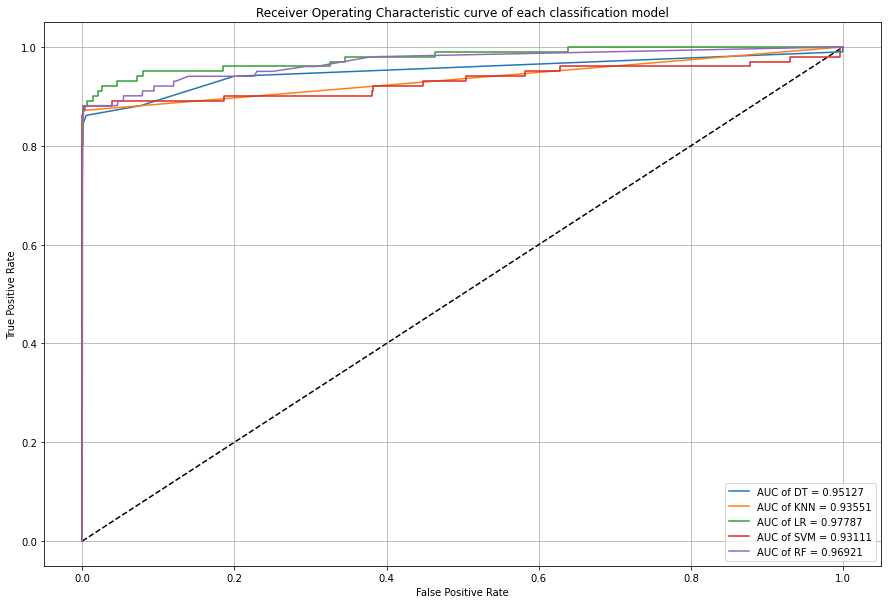

Optimal threshold of Decision Tree:0.013
Optimal threshold of KNN Model:0.200
Optimal threshold of Logistic Regression Model:0.002
Optimal threshold of SVM Model:0.001
Optimal threshold of Random Forest Model:0.006


In [64]:
plt.figure(figsize=(15,10))

plt.plot([0,1],[0,1], 'k--')


#### Decision Tree

fp1 , tp1, thresholds1 = roc_curve(y_test, tree_model_pred_test_prob)

tree_model_auc = roc_auc_score(y_test, tree_model_pred_test_prob)

plt.plot(fp1, tp1, label= "AUC of DT = %.5f" % tree_model_auc )

cutoff=np.argmax(np.abs(tp1-fp1)) 

optimal_threshold_1 = thresholds1[cutoff]


#### KNN Model

fp2 , tp2, thresholds2 = roc_curve(y_test, knn_pred_test_prob)

knn_model_auc = roc_auc_score(y_test, knn_pred_test_prob)

plt.plot(fp2, tp2, label= "AUC of KNN = %.5f" % knn_model_auc)

cutoff=np.argmax(np.abs(tp2-fp2)) 

optimal_threshold_2 = thresholds2[cutoff]


#### Logistic Regression

fp3 , tp3, thresholds3 = roc_curve(y_test, lr_pred_test_prob)

lr_model_auc = roc_auc_score(y_test, lr_pred_test_prob)

plt.plot(fp3, tp3, label= "AUC of LR = %.5f" % lr_model_auc)

cutoff=np.argmax(np.abs(tp3-fp3)) 

optimal_threshold_3 = thresholds3[cutoff]


### SVM

fp4 , tp4, thresholds4 = roc_curve(y_test, svm_pred_test_prob)

svm_model_auc = roc_auc_score(y_test, svm_pred_test_prob)

plt.plot(fp4, tp4, label= "AUC of SVM = %.5f" % svm_model_auc)

cutoff=np.argmax(np.abs(tp4-fp4)) 

optimal_threshold_4 = thresholds4[cutoff]


### Random Forest

fp5 , tp5, thresholds5 = roc_curve(y_test, rf_pred_test_prob)

rf_model_auc = roc_auc_score(y_test, rf_pred_test_prob)

plt.plot(fp5, tp5, label= "AUC of RF = %.5f" % rf_model_auc)

cutoff=np.argmax(np.abs(tp5-fp5)) 

optimal_threshold_5 = thresholds5[cutoff]



#### Additional plot elements

plt.legend()

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title('Receiver Operating Characteristic curve of each classification model')

plt.grid()

plt.show()

print("Optimal threshold of Decision Tree:{0:.3f}".format(optimal_threshold_1))
print("Optimal threshold of KNN Model:{0:.3f}".format(optimal_threshold_2))
print("Optimal threshold of Logistic Regression Model:{0:.3f}".format(optimal_threshold_3))
print("Optimal threshold of SVM Model:{0:.3f}".format(optimal_threshold_4))
print("Optimal threshold of Random Forest Model:{0:.3f}".format(optimal_threshold_5))

- AUC Score Dataframe

In [65]:
auc = pd.DataFrame({"Classification Model": ["Decision Tree", "KNN", "Logistic Regression", "SVM", "Random Forest"],
                       "AUC":[tree_model_auc, knn_model_auc, lr_model_auc, svm_model_auc, rf_model_auc],
                       "Optimal Threshold":[optimal_threshold_1, optimal_threshold_2, optimal_threshold_3, optimal_threshold_4, optimal_threshold_5]
                   })
auc

,Classification Model,AUC,Optimal Threshold
0,Decision Tree,0.951,0.013
1,KNN,0.936,0.200
2,Logistic Regression,0.978,0.002
3,SVM,0.931,0.001
4,Random Forest,0.969,0.006


- Smote

In [66]:
df_copy = df.copy(deep=True)

In [67]:
X

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  2.44964263e-01],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02, -3.42474541e-01],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  1.16068593e+00],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02, -8.18393021e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01, -3.13248531e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  5.14355311e-01]])

In [68]:
# Dataframe for scaling
tempDF = df_copy.copy(deep=True)
tempDF.drop(columns='Class', inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Counter({0: 227454, 1: 391})


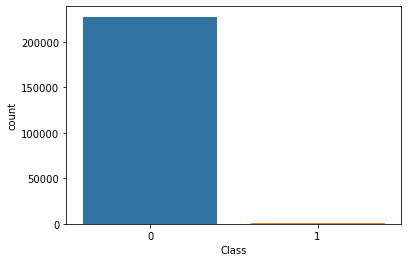

In [69]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
sns.countplot(x="Class", data=pd.DataFrame(data={'Class':y_train}))

Counter({0: 227454, 1: 227454})


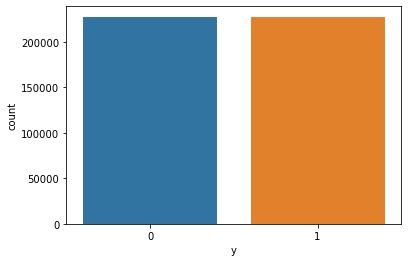

In [70]:
# Import package

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train2}))

- Decision Tree

In [71]:
# Create object and train the model
classModel = KNeighborsClassifier(n_neighbors=5)
classModel.fit(X_train_scaled2, y_train2) # train the model (not training in reality)
print("--- %s seconds ---" % (time.time() - start_time))

--- 268.0967061519623 seconds ---


In [75]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 4775.251606464386 seconds ---


In [76]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain)]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4775.313987970352 seconds ---


In [77]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
    ax.set_ylim(bottom + 0.5, top - 0.5) #

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

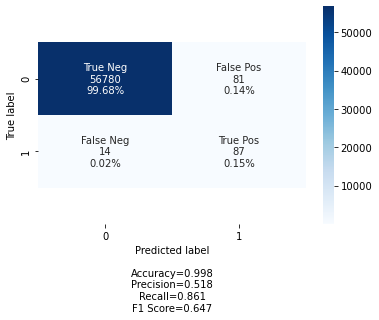

In [78]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [79]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.999,0.998
1,PRECISION,0.999,0.518
2,RECALL,1.000,0.861


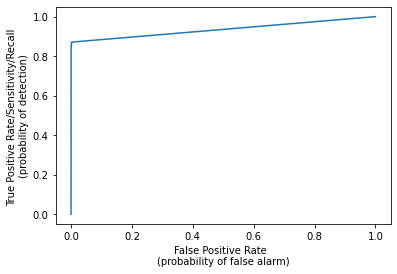

AUC:0.935
Optimal threshold:0.400


In [80]:
# ROC curve
probs = classModel.predict_proba(X_test_scaled)
FP,TP,thresholds = metrics.roc_curve(y_test,probs[:,1])
plt.plot(FP,TP,label="ROC")
plt.xlabel("False Positive Rate  \n(probability of false alarm)")
plt.ylabel("True Positive Rate/Sensitivity/Recall \n(probability of detection)")
cutoff=np.argmax(np.abs(TP-FP)) 
optimal_threshold = thresholds[cutoff]
plt.show()
print("AUC:{0:.3f}".format(metrics.auc(FP, TP)))
print("Optimal threshold:{0:.3f}".format(optimal_threshold))

- KNN Evaluation

In [81]:
# Create object and train the model
classModel = KNeighborsClassifier(n_neighbors=5)
classModel.fit(X_train_scaled2, y_train2) # train the model (not training in reality)
print("--- %s seconds ---" % (time.time() - start_time))

--- 5214.2535083293915 seconds ---


In [82]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 9254.92974948883 seconds ---


In [83]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain)]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [84]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
    ax.set_ylim(bottom + 0.5, top - 0.5) #

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

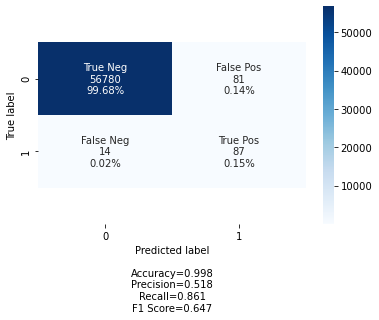

In [85]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [86]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.999,0.998
1,PRECISION,0.999,0.518
2,RECALL,1.000,0.861


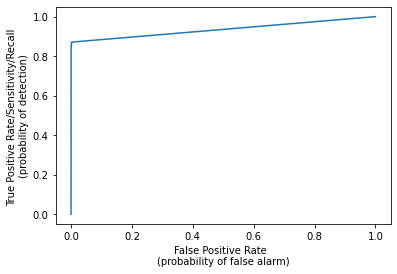

AUC:0.935
Optimal threshold:0.400


In [87]:
# ROC curve
probs = classModel.predict_proba(X_test_scaled)
FP,TP,thresholds = metrics.roc_curve(y_test,probs[:,1])
plt.plot(FP,TP,label="ROC")
plt.xlabel("False Positive Rate  \n(probability of false alarm)")
plt.ylabel("True Positive Rate/Sensitivity/Recall \n(probability of detection)")
cutoff=np.argmax(np.abs(TP-FP)) 
optimal_threshold = thresholds[cutoff]
plt.show()
print("AUC:{0:.3f}".format(metrics.auc(FP, TP)))
print("Optimal threshold:{0:.3f}".format(optimal_threshold))

- Logistic Regression

In [88]:
# Create object and train the model
classModel = LogisticRegression()
classModel.fit(X_train_scaled2, y_train2) # train the model (not training in reality)
print("--- %s seconds ---" % (time.time() - start_time))

--- 9696.618718147278 seconds ---


C:\Users\raimu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 9696.669435501099 seconds ---


In [90]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain)]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [91]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
    ax.set_ylim(bottom + 0.5, top - 0.5) #

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

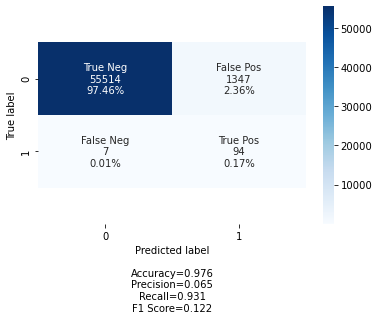

In [92]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [93]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.942,0.976
1,PRECISION,0.974,0.065
2,RECALL,0.908,0.931


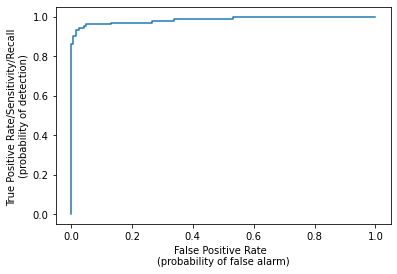

AUC:0.985
Optimal threshold:0.597


In [94]:
# ROC curve
probs = classModel.predict_proba(X_test_scaled)
FP,TP,thresholds = metrics.roc_curve(y_test,probs[:,1])
plt.plot(FP,TP,label="ROC")
plt.xlabel("False Positive Rate  \n(probability of false alarm)")
plt.ylabel("True Positive Rate/Sensitivity/Recall \n(probability of detection)")
cutoff=np.argmax(np.abs(TP-FP)) 
optimal_threshold = thresholds[cutoff]
plt.show()
print("AUC:{0:.3f}".format(metrics.auc(FP, TP)))
print("Optimal threshold:{0:.3f}".format(optimal_threshold))

- SVM

In [109]:
# Create object and train the model
classModel = SVC(probability = True)
classModel.fit(X_train_scaled2, y_train2) # train the model (not training in reality)
print("--- %s seconds ---" % (time.time() - start_time))

--- 63977.70438289642 seconds ---


In [110]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 67025.1759622097 seconds ---


In [111]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain)]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [112]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
    ax.set_ylim(bottom + 0.5, top - 0.5) #

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

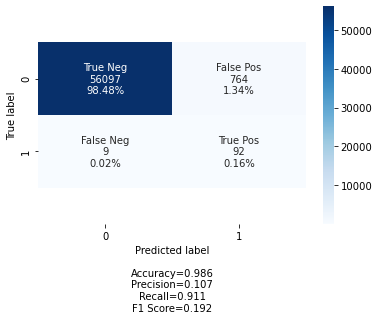

In [113]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [114]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.965,0.986
1,PRECISION,0.986,0.107
2,RECALL,0.944,0.911


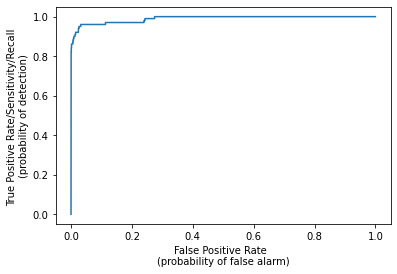

AUC:0.990
Optimal threshold:0.365


In [115]:
# ROC curve
probs = classModel.predict_proba(X_test_scaled)
FP,TP,thresholds = metrics.roc_curve(y_test,probs[:,1])
plt.plot(FP,TP,label="ROC")
plt.xlabel("False Positive Rate  \n(probability of false alarm)")
plt.ylabel("True Positive Rate/Sensitivity/Recall \n(probability of detection)")
cutoff=np.argmax(np.abs(TP-FP)) 
optimal_threshold = thresholds[cutoff]
plt.show()
print("AUC:{0:.3f}".format(metrics.auc(FP, TP)))
print("Optimal threshold:{0:.3f}".format(optimal_threshold))

- Random Forest

In [116]:
# Create object and train the model
classModel = RandomForestClassifier()
classModel.fit(X_train_scaled2, y_train2) # train the model (not training in reality)
print("--- %s seconds ---" % (time.time() - start_time))

--- 67674.5430984497 seconds ---


In [117]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 67680.95721268654 seconds ---


In [118]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain)]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [119]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
    ax.set_ylim(bottom + 0.5, top - 0.5) #

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

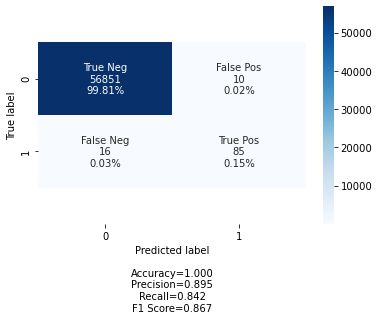

In [120]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [121]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,1.0,1.000
1,PRECISION,1.0,0.895
2,RECALL,1.0,0.842


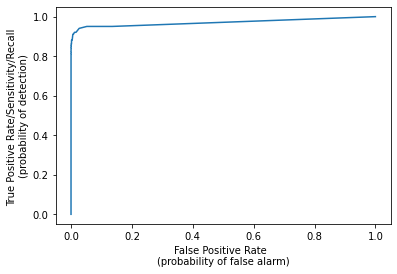

AUC:0.971
Optimal threshold:0.030


In [122]:
# ROC curve
probs = classModel.predict_proba(X_test_scaled)
FP,TP,thresholds = metrics.roc_curve(y_test,probs[:,1])
plt.plot(FP,TP,label="ROC")
plt.xlabel("False Positive Rate  \n(probability of false alarm)")
plt.ylabel("True Positive Rate/Sensitivity/Recall \n(probability of detection)")
cutoff=np.argmax(np.abs(TP-FP)) 
optimal_threshold = thresholds[cutoff]
plt.show()
print("AUC:{0:.3f}".format(metrics.auc(FP, TP)))
print("Optimal threshold:{0:.3f}".format(optimal_threshold))